# Difference between bathymetry with 3.095 & without it

In [1]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
%matplotlib inline

In [2]:
original_tracers = nc.Dataset('/data/jieliu/MEOPAR/SalishSea/results/original_bathy/SalishSea_1h_20020915_20020915_grid_T.nc')
later_tracers = nc.Dataset('/data/jieliu/MEOPAR/SalishSea/results/add_3.095_with_juninitial/SalishSea_1h_20020915_20020915_grid_T.nc')

In [3]:
nc_tools.show_variables(later_tracers)

[u'deptht', u'nav_lat', u'nav_lon', u'rain_rate', u'snow_rate', u'sossheig', u'time_counter', u'time_counter_bnds', u'vosaline', u'votemper']


In [4]:
salinity1 = original_tracers.variables['vosaline']
salinity2 = later_tracers.variables['vosaline']
lon = original_tracers.variables['nav_lon']
lat = original_tracers.variables['nav_lat']
zlevels = original_tracers.variables['deptht']
print (salinity1.shape)

(1, 40, 898, 398)


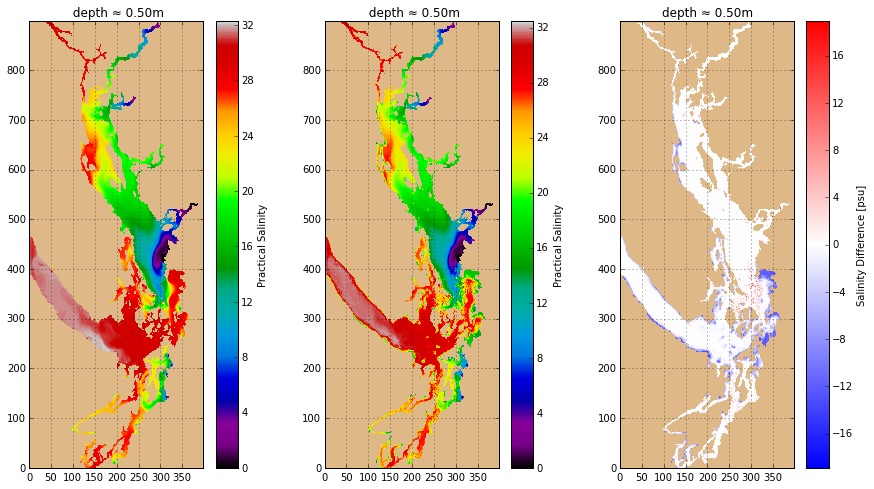

In [5]:
t, zlevel = 0, 0
salinity1_tz = np.ma.masked_values(salinity1[t, zlevel], 0)
salinity2_tz = np.ma.masked_values(salinity2[t, zlevel], 0)

fig, axs = plt.subplots(1, 3, figsize=(15, 8))
for ax in axs:
    viz_tools.set_aspect(ax)

cmap = plt.get_cmap('jet')
anomaly_cmap = plt.get_cmap('bwr')
for c in (cmap, anomaly_cmap):
    c.set_bad('burlywood')
    
ax = axs[0]
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(salinity1_tz, cmap=cmap)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('Practical Salinity')
ax.set_xlim(0, salinity1_tz.shape[1])
ax.set_ylim(0, salinity1_tz.shape[0])
ax.grid()
ax.set_title(u' depth \u2248 {d:.2f}{z.units}'.format( d=zlevels[zlevel], z=zlevels))

ax = axs[1]
mesh = ax.pcolormesh(salinity2_tz, cmap=cmap)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('Practical Salinity')
ax.set_xlim(0, salinity2_tz.shape[1])
ax.set_ylim(0, salinity2_tz.shape[0])
ax.grid()
ax.set_title(u' depth \u2248 {d:.2f}{z.units}'.format( d=zlevels[zlevel], z=zlevels))

ax = axs[2]
salinity_diff = salinity2[t, zlevel] - salinity1[t, zlevel]
salinity_diff = np.ma.masked_values(salinity_diff, 0, copy=False)
abs_max = viz_tools.calc_abs_max(salinity_diff)
mesh = ax.pcolormesh(salinity_diff, cmap=anomaly_cmap, vmin=-abs_max, vmax=abs_max)
cbar = fig.colorbar(mesh, ax=ax)
ax.set_title(u'depth \u2248 {d:.2f}{z.units}'.format(d=zlevels[zlevel], z=zlevels))
ax.set_xlim(0, salinity_diff.shape[1])
ax.set_ylim(0, salinity_diff.shape[0])
ax.grid()
cbar.set_label('{label} Difference [{units}]'.format(label=salinity1.long_name.title(), units=salinity1.units))

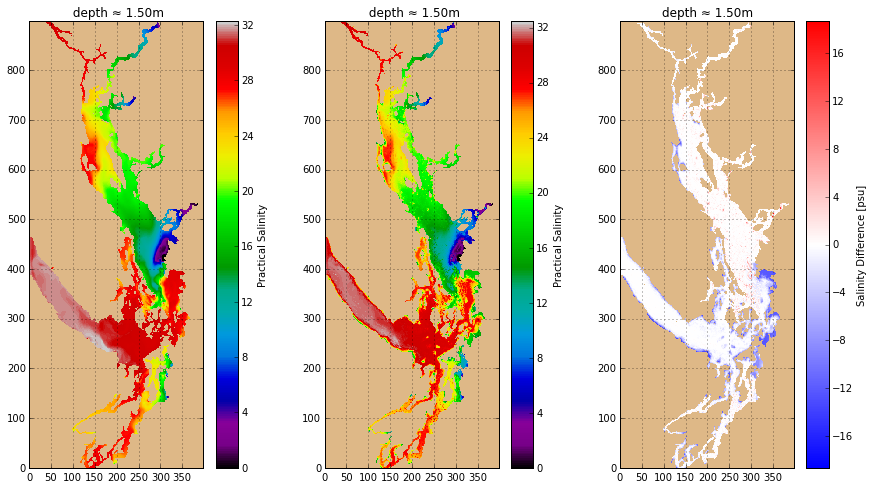

In [15]:
t, zlevel = 0, 1
salinity1_tz = np.ma.masked_values(salinity1[t, zlevel], 0)
salinity2_tz = np.ma.masked_values(salinity2[t, zlevel], 0)

fig, axs = plt.subplots(1, 3, figsize=(15, 8))
for ax in axs:
    viz_tools.set_aspect(ax)

cmap = plt.get_cmap('jet')
anomaly_cmap = plt.get_cmap('bwr')
for c in (cmap, anomaly_cmap):
    c.set_bad('burlywood')
    
ax = axs[0]
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(salinity1_tz, cmap=cmap)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('Practical Salinity')
ax.set_xlim(0, salinity1_tz.shape[1])
ax.set_ylim(0, salinity1_tz.shape[0])
ax.grid()
ax.set_title(u' depth \u2248 {d:.2f}{z.units}'.format( d=zlevels[zlevel], z=zlevels))

ax = axs[1]
mesh = ax.pcolormesh(salinity2_tz, cmap=cmap)
cbar = fig.colorbar(mesh, ax=ax)
cbar.set_label('Practical Salinity')
ax.set_xlim(0, salinity2_tz.shape[1])
ax.set_ylim(0, salinity2_tz.shape[0])
ax.grid()
ax.set_title(u' depth \u2248 {d:.2f}{z.units}'.format( d=zlevels[zlevel], z=zlevels))

ax = axs[2]
salinity_diff = salinity2[t, zlevel] - salinity1[t, zlevel]
salinity_diff = np.ma.masked_values(salinity_diff, 0, copy=False)
abs_max = viz_tools.calc_abs_max(salinity_diff)
mesh = ax.pcolormesh(salinity_diff, cmap=anomaly_cmap, vmin=-abs_max, vmax=abs_max)
cbar = fig.colorbar(mesh, ax=ax)
ax.set_title(u'depth \u2248 {d:.2f}{z.units}'.format(d=zlevels[zlevel], z=zlevels))
ax.set_xlim(0, salinity_diff.shape[1])
ax.set_ylim(0, salinity_diff.shape[0])
ax.grid()
cbar.set_label('{label} Difference [{units}]'.format(label=salinity1.long_name.title(), units=salinity1.units))

In [6]:
grid = nc.Dataset('../nemo-forcing/grid/bathy_meter_SalishSea2.nc')
bathy = grid.variables['Bathymetry'][:]

(0, 398, 0, 898)

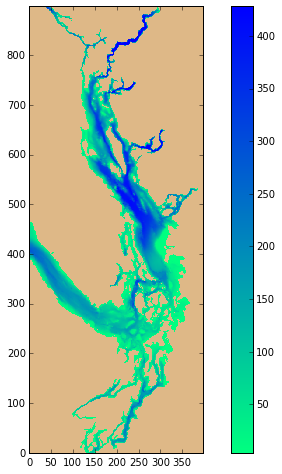

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
plt.axis((0, bathy.shape[1], 0, bathy.shape[0]))

(310, 341, 410, 442)

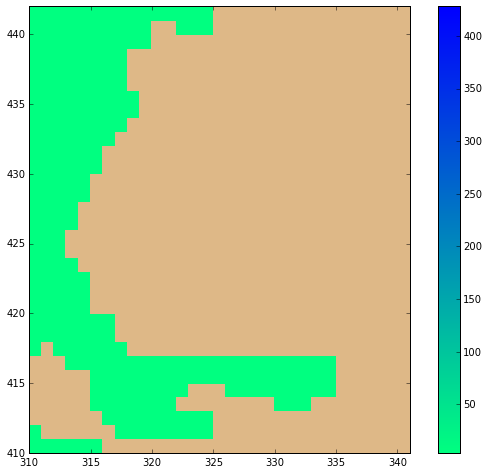

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
plt.axis((310, 341, 410, 442))

In [9]:
test_tracer = nc.Dataset('SoG0318_1y_salinity_nomask.nc')

In [10]:
nc_tools.show_variables(test_tracer)

[u'nav_lat', u'nav_lon', u'deptht', u'time_counter', u'vosaline']


In [11]:
salinity = test_tracer.variables['vosaline'][0]
lon = test_tracer.variables['nav_lon']
lat = test_tracer.variables['nav_lat']
print (lon.shape)

(345, 398)


In [12]:
print (salinity[0].shape)

(345, 398)


(0, 345, 0, 398)

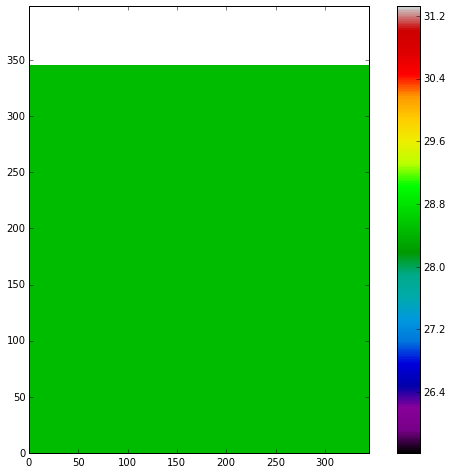

In [13]:
## spatial distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(salinity[0], cmap=cmap)
cbar = fig.colorbar(mesh)
plt.axis((0, salinity.shape[1], 0, salinity.shape[2]))

<matplotlib.contour.QuadContourSet instance at 0x7fc530132c20>

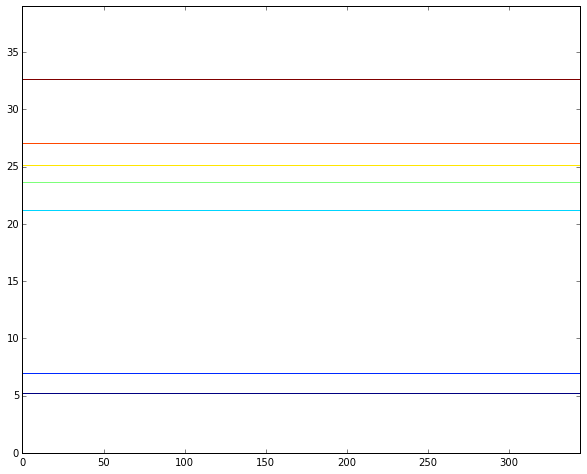

In [14]:
## vertical profile
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FixedLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d, Axes3D
import pylab as p

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.contour(salinity[:,:,1])